In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
sys.path.append('../')
import model
import cost
import constraints
from scipy.integrate import solve_ivp
from Scvx import Scvx

In [3]:
ix = 3
iu = 2
ih = 2
N = 500
delT = 0.1
max_iter = 100

In [18]:
xi = np.zeros(3)
xi[0] = -2.0
xi[1] = -2.0 
xi[2] = 0

xf = np.zeros(3)
xf[0] = 2.0
xf[1] = 2.0
xf[2] = 0.0

myModel = model.unicycle('Hello',ix,iu,delT)
myCost = cost.unicycle('Hello',np.zeros(3),N)
myConst = constraints.UnicycleConstraints('Hello',ix,iu,ih)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N,iu))

In [ ]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost,myConst)
x, u = i1.update(x0,u0)

Boundary conditions are not satisified: just accep this step
iteration   cost        cost_vc   cost_tr   reduction    expected    radius_tr
0           0           1.5e+06     0           1.5e+06     1.5e+06     3.0         
Boundary conditions are not satisified: just accep this step
non-positive expected reduction: should not occur
1           1.95e-33    6.66e-17    2.08e-16    -4e+04      -4e+04      6.0         
Boundary conditions are not satisified: just accep this step
2           16          4e+04       6.67        4e+04       4e+04       3.0         
Boundary conditions are not satisified: just accep this step
non-positive expected reduction: should not occur
3           28.4        0.000345    9.11        -3.69       -3.69       6.0         
Boundary conditions are not satisified: just accep this step
non-positive expected reduction: should not occur
4           36.3        0.00013     4.85        -1.52       -1.52       3.0         
5           40.7        0.000126    2.04 

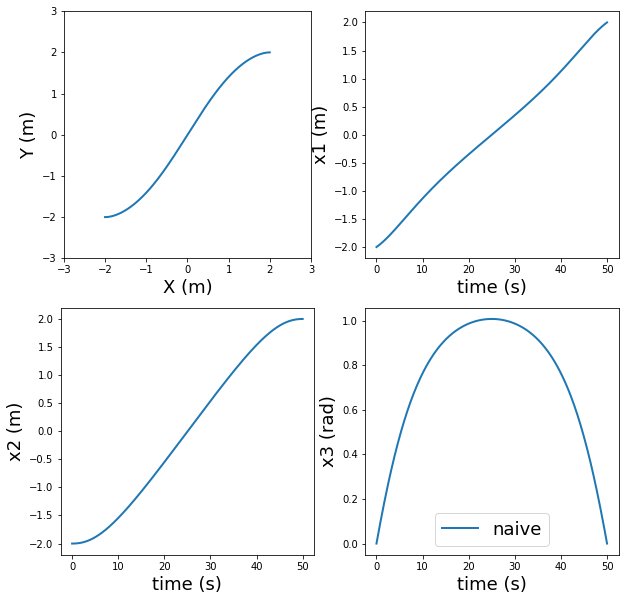

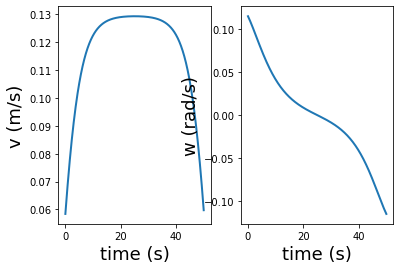

In [20]:
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
# plt.plot(x_t[0],x_t[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()

In [ ]:
a = np.vstack((np.ones((10,2)),np.zeros(2)))
print_np(a)